In this notebook, we take check how transmission converges when ind is large enough.

In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

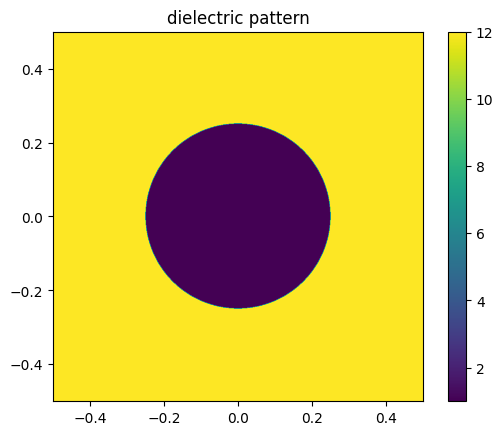

In [27]:
### some params
DEG = np.pi/180
Ny=Nx=1000 ### resolution for dielectric pattern
eps = np.ones([Ny,Nx])*12 ### uniform dielectric slab
radius = 0.25
thickness = 0.2
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Ny)
xs,ys = np.meshgrid(xs,ys)
eps[xs**2 + ys**2 < radius**2] = 1 ### air holes in dielectric slab
plt.imshow(eps,extent=[-0.5,0.5,-0.5,0.5]); plt.colorbar(); plt.title('dielectric pattern'); plt.show()
### frequencies to scan through:
freqs = np.linspace(0.6,0.8,101)
inds = range(1,6)

### untwisted case:
seems to be converging after 

In [31]:
try:
    trans = np.load('1example3-trans-untwisted.pkl',allow_pickle=True)
except Exception as e:
    print(e)
    trans = []
    kxkys = []
    twist = 0*DEG
    for ind in inds:
        NM = (2*ind+1)**2
        NMNM = NM**2
        obj = rcwa([eps,None,eps], [thickness,0,thickness], [1,1,2], gap_layer_indices=[1], twist=twist, N=ind, M=ind, verbose=0)
        for freq in tqdm(freqs):
            obj.set_freq_k(freq, (0, 0))
            (r,t), (reflected,transmitted) = obj.get_RT(0,1)
            trans.append(t)
    trans = np.array(trans).reshape(len(inds),len(freqs))
    trans.dump('example3-trans-untwisted.pkl')

[Errno 2] No such file or directory: '1example3-trans-untwisted.pkl'


100%|██████████| 141/141 [01:09<00:00,  2.02it/s]


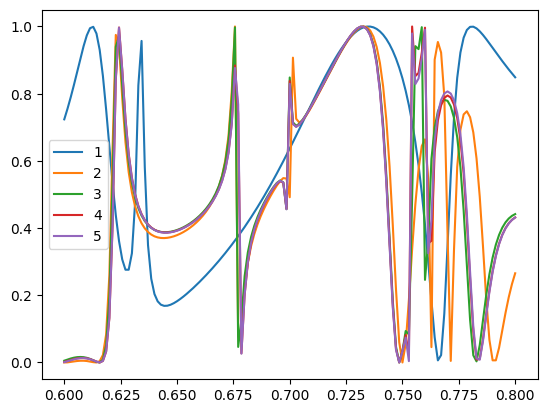

In [32]:
plt.plot(freqs,trans.T)
plt.legend(inds)

### twisted case:
seems to be not converging within ind=3

In [30]:
try:
    trans = np.load('example3-trans-twisted.pkl',allow_pickle=True)
except Exception as e:
    print(e)
    trans = []
    kxkys = []
    twist = 10*DEG
    for ind in inds:
        NM = (2*ind+1)**2
        NMNM = NM**2
        obj = rcwa([eps,None,eps], [thickness,thickness,thickness], [1,1,2], gap_layer_indices=[1], twist=twist, N=ind, M=ind, verbose=0)
        for freq in tqdm(freqs):
            obj.set_freq_k(freq, (0, 0))
            (r,t), (reflected,transmitted) = obj.get_RT(0,1)
            trans.append(t)
    trans = np.array(trans).reshape(len(inds),len(freqs))
    trans.dump('example3-trans-twisted.pkl')

[Errno 2] No such file or directory: 'example3-trans-twisted.pkl'


 20%|█▉        | 28/141 [1:27:16<5:52:11, 187.01s/it]


KeyboardInterrupt: 

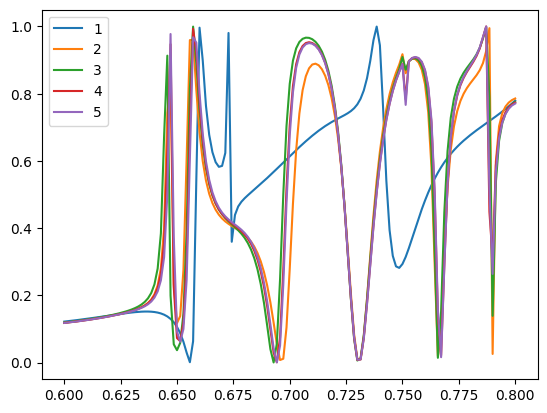

In [ ]:
plt.plot(freqs,trans.T)
plt.legend(inds)